In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import csv

In [2]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 5736 rows and 2 Columns



Accuracy train by acc_r2 88.75316105312695

Accuracy train by median_ab_error 16.0


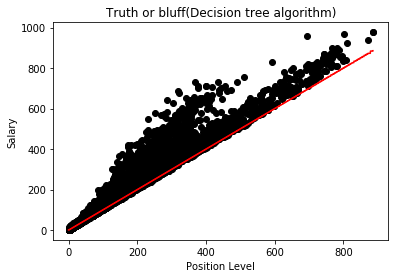

In [4]:
class Testing():
           
    def y_prediction(self,regression, x_test):
        
        y_predict = regression.predict(x_test.reshape(-1,1))
        return y_predict
        

    def accuracy(self,y_predict_train,y_train):
       
        acc_r2 = r2_score(y_train, y_predict_train)*100    
#         acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_test,y_test, regression):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_test), max(x_test), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_test,y_test, color = 'black')

        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'red')
        plt.title("Truth or bluff(Decision tree algorithm)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Testing()
    
    # seperate fetures and label
    x_test = test_dataset.iloc[:,:1].values
    y_test = test_dataset.iloc[:,1].values
 
    
    file1 = open('DecisionTreeModule2nd.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_test_pre = obj.y_prediction(reg1, x_test)
   
    
    acc_r2, median_ab_error = obj.accuracy(y_test_pre,y_test)
    print("\nAccuracy train by acc_r2", acc_r2)
    print("\nAccuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_test,y_test,reg1)

if __name__ == '__main__':
    main()
